In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/home/hp/DBDA/ML/machine-learning/Assignments/Churn.csv")

In [12]:
df.head(15)

RowNumber  CustomerId  Surname  CreditScore Geography  Gender  Age  \
0           1    15634602     1115          619    France  Female   42   
1           2    15647311     1177          608     Spain  Female   41   
2           3    15619304     2040          502    France  Female   42   
3           4    15701354      289          699    France  Female   39   
4           5    15737888     1822          850     Spain  Female   43   
5           6    15574012      537          645     Spain    Male   44   
6           7    15592531      177          822    France    Male   50   
7           8    15656148     2000          376   Germany  Female   29   
8           9    15792365     1146          501    France    Male   44   
9          10    15592389     1081          684    France    Male   27   
10         11    15767821      195          528    France    Male   31   
11         12    15737173       83          497     Spain    Male   24   
12         13    15632264     1369          476    France  Female   34   
13         14    15691483      515          549    France  Female   25   
14         15    15600882     2389          635     Spain  Female   35   

    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        2       0.00              1          1               1   
1        1   83807.86              1          0               1   
2        8  159660.80              3          1               0   
3        1       0.00              2          0               0   
4        2  125510.82              1          1               1   
5        8  113755.78              2          1               0   
6        7       0.00              2          1               1   
7        4  115046.74              4          1               0   
8        4  142051.07              2          0               1   
9        2  134603.88              1          1               1   
10       6  102016.72              2          0               0   
11       3       0.00              2          1               0   
12      10       0.00              2          1               0   
13       5       0.00              2          0               0   
14       7       0.00              2          1               1   

    EstimatedSalary  Exited  
0         101348.88       1  
1         112542.58       0  
2         113931.57       1  
3          93826.63       0  
4          79084.10       0  
5         149756.71       1  
6          10062.80       0  
7         119346.88       1  
8          74940.50       0  
9          71725.73       0  
10         80181.12       0  
11         76390.01       0  
12         26260.98       0  
13        190857.79       0  
14         65951.65       0

In [ ]:
df.shape

In [6]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [9]:
df.value_counts()

RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave    619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6671       15667932    Bellucci    758          Spain      Female  43   10      0.00       2              1          1               55313.44         0         1
6664       15766185    She         850          Germany    Male    31   4       146587.30  1              1          1               89874.82         0         1
6665       15667632    Birdseye    703          France     Female  42   7       0.00       2              0          1               72500.68         0         1
6666       15599024    Hope        506          Spain      Male    32   8       0.00       2              0          1               182692.80        0         1
                                 

In [14]:
# convert the species to numeric values
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Surname'] = encoder.fit_transform(df['Surname'])

df['Gender'] = encoder.fit_transform(df['Gender'])
df['Geography'] = encoder.fit_transform(df['Geography'])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [16]:
df.corr()

RowNumber  CustomerId   Surname  CreditScore  Geography  \
RowNumber         1.000000    0.004202  0.001682     0.005840  -0.010358   
CustomerId        0.004202    1.000000  0.005689     0.005308   0.006516   
Surname           0.001682    0.005689  1.000000     0.007489  -0.022878   
CreditScore       0.005840    0.005308  0.007489     1.000000   0.007888   
Geography        -0.010358    0.006516 -0.022878     0.007888   1.000000   
Gender            0.018196   -0.002641 -0.002049    -0.002857   0.004719   
Age               0.000783    0.009497  0.005550    -0.003965   0.022812   
Tenure           -0.006495   -0.014883 -0.017412     0.000842   0.003739   
Balance          -0.009067   -0.012419  0.002657     0.006268   0.069408   
NumOfProducts     0.007246    0.016972 -0.016460     0.012238   0.003972   
HasCrCard         0.000599   -0.014025 -0.008993    -0.005458  -0.008523   
IsActiveMember    0.012044    0.001665  0.001483     0.025651   0.006724   
EstimatedSalary  -0.005988    0.015271  0.011850    -0.001384  -0.001369   
Exited           -0.016571   -0.006248 -0.010822    -0.027094   0.035943   

                   Gender       Age    Tenure   Balance  NumOfProducts  \
RowNumber        0.018196  0.000783 -0.006495 -0.009067       0.007246   
CustomerId      -0.002641  0.009497 -0.014883 -0.012419       0.016972   
Surname         -0.002049  0.005550 -0.017412  0.002657      -0.016460   
CreditScore     -0.002857 -0.003965  0.000842  0.006268       0.012238   
Geography        0.004719  0.022812  0.003739  0.069408       0.003972   
Gender           1.000000 -0.027544  0.014733  0.012087      -0.021859   
Age             -0.027544  1.000000 -0.009997  0.028308      -0.030680   
Tenure           0.014733 -0.009997  1.000000 -0.012254       0.013444   
Balance          0.012087  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts   -0.021859 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard        0.005766 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember   0.022544  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary -0.008112 -0.007201  0.007784  0.012797       0.014204   
Exited          -0.106512  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
RowNumber         0.000599        0.012044        -0.005988 -0.016571  
CustomerId       -0.014025        0.001665         0.015271 -0.006248  
Surname          -0.008993        0.001483         0.011850 -0.010822  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Geography        -0.008523        0.006724        -0.001369  0.035943  
Gender            0.005766        0.022544        -0.008112 -0.106512  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

In [17]:
df.head(3)

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602     1115          619          0       0   42   
1          2    15647311     1177          608          2       0   41   
2          3    15619304     2040          502          0       0   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1

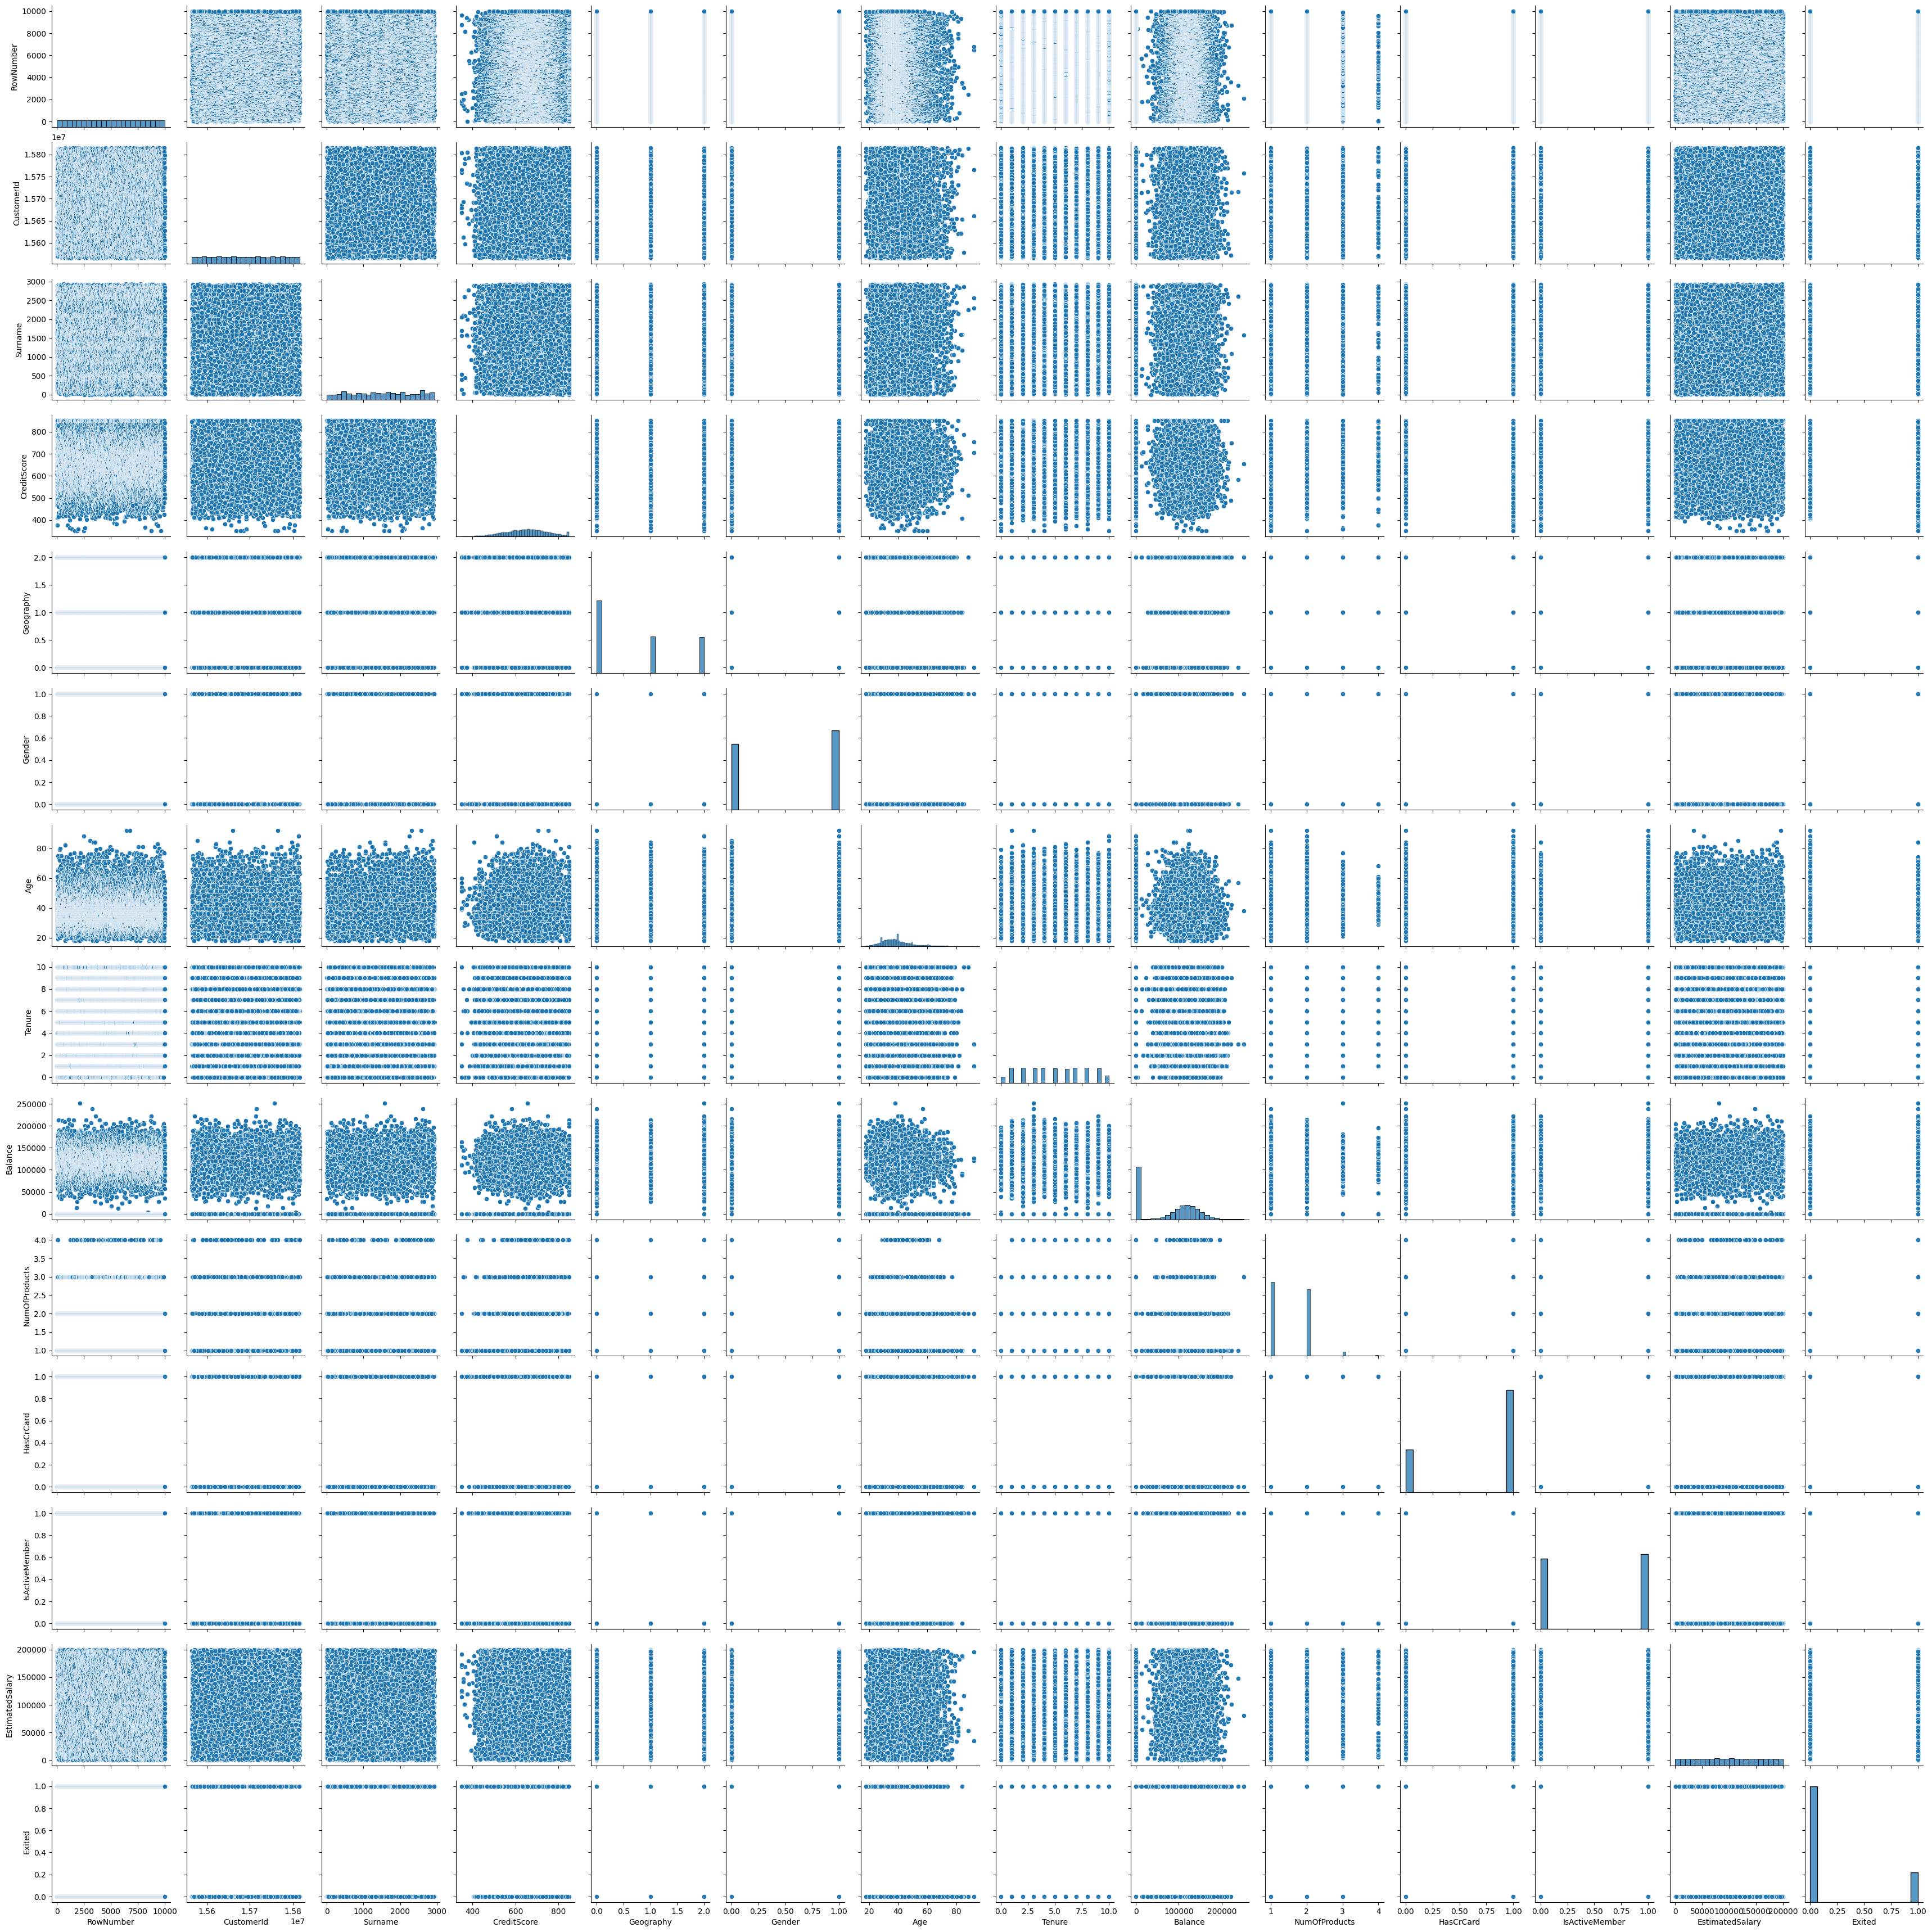

In [18]:
sns.pairplot(df)

In [19]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=123456)

In [30]:
def train_model_lg():
    from sklearn.linear_model import LogisticRegressionCV

    model = LogisticRegressionCV(max_iter=10000)
    model.fit(x_train, y_train)
    return model

In [22]:
def train_model_knn():
    from sklearn.neighbors import KNeighborsClassifier

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(x_train, y_train)
    return model

In [23]:
def train_model_svm():
    from sklearn.svm import SVC
    model = SVC(C=2, gamma='auto')
    model.fit(x_train, y_train)
    return model

In [24]:
def train_model_dt():
    from sklearn.tree import DecisionTreeClassifier
    model  = DecisionTreeClassifier(max_depth=5)
    model.fit(x_train, y_train)
    return model

In [25]:
def train_model_rf():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=1000)
    model.fit(x_train, y_train)
    return model

In [26]:
def train_model_nb():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train,y_train)
    return model

In [31]:
def train_model_adaboot():
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier()
    model.fit(x_train, y_train)
    return model
    

In [32]:
def train_model_xgb():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train,y_train)
    return model

In [33]:
def train_model_catboost():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier()
    model.fit(x_train,y_train)
    return model

In [35]:
models = [
    (train_model_lg(), 'Logistic Regression'),
    (train_model_knn(), 'KNN'),
    (train_model_svm(), 'SVM'),
    (train_model_nb(), 'Naive Bayes'),
    (train_model_dt(), 'Decision Tree'),
    (train_model_rf(), 'Random Forest'),
    (train_model_catboost(), 'CabBoost'),
    (train_model_adaboot(), 'AdaBoost'),
    (train_model_xgb(), 'XG Boost')
]


Learning rate set to 0.025035
0:	learn: 0.6726379	total: 51.9ms	remaining: 51.8s
1:	learn: 0.6532911	total: 56.2ms	remaining: 28s
2:	learn: 0.6353396	total: 60.2ms	remaining: 20s
3:	learn: 0.6177029	total: 67.8ms	remaining: 16.9s
4:	learn: 0.6017075	total: 71.6ms	remaining: 14.2s
5:	learn: 0.5864835	total: 75.7ms	remaining: 12.5s
6:	learn: 0.5743796	total: 79.6ms	remaining: 11.3s
7:	learn: 0.5628760	total: 82.9ms	remaining: 10.3s
8:	learn: 0.5502011	total: 85.9ms	remaining: 9.46s
9:	learn: 0.5374047	total: 89ms	remaining: 8.81s
10:	learn: 0.5275403	total: 93.1ms	remaining: 8.37s
11:	learn: 0.5176275	total: 97.2ms	remaining: 8s
12:	learn: 0.5073341	total: 100ms	remaining: 7.62s
13:	learn: 0.4979993	total: 104ms	remaining: 7.29s
14:	learn: 0.4907633	total: 107ms	remaining: 7s
15:	learn: 0.4825994	total: 110ms	remaining: 6.74s
16:	learn: 0.4750108	total: 113ms	remaining: 6.51s
17:	learn: 0.4678519	total: 116ms	remaining: 6.31s
18:	learn: 0.4619993	total: 119ms	remaining: 6.13s
19:	learn: 

/home/hp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [36]:
## Evaluate the model

In [37]:
def evaluate_model(model, model_name):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    y_pred = model.predict(x_test)
    y_true = y_test
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return model_name, accuracy , precision, recall, f1

In [39]:
data = []
for (model, model_name) in models:
    data.append(evaluate_model(model, model_name))

result = pd.DataFrame(data, columns=['Algorithm', 'Accuracy','Precision','Recall','F1_Score'])
result

/home/hp/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Algorithm  Accuracy  Precision    Recall  F1_Score
0  Logistic Regression    0.7810   0.305085  0.043373  0.075949
1                  KNN    0.7270   0.208889  0.113253  0.146875
2                  SVM    0.7925   0.000000  0.000000  0.000000
3          Naive Bayes    0.7880   0.434783  0.072289  0.123967
4        Decision Tree    0.8395   0.783133  0.313253  0.447504
5        Random Forest    0.8485   0.788660  0.368675  0.502463
6             CabBoost    0.8520   0.759825  0.419277  0.540373
7             AdaBoost    0.8470   0.720648  0.428916  0.537764
8             XG Boost    0.8410   0.691700  0.421687  0.523952